# PROJEKTNA NALOGA

Uvod
--------

V projektni nalogi bom analiziral podatke iz igre *Fifa 19*, povzetih po strani [FUTBIN](https://www.futbin.com).  
  
Naj predstavim potek dela. Na začetku, bom predstavil podatke, da se z njimi pobližje spoznamo in dobimo pravi občutek, s čim imamo opravka. Nato bomo pregledali tiste osnovne podatke iz različnih kategorij. Za tem se bomo osredotočili na pozicije igralcev in analizirali te podatke. Za konec pa bomo pogledali še vse sposobnosti, ki bi lahko vplivale na ceno igralcev.

Predpriprava
-------------------

In [1]:
# Naložim vse potrebne pakete
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
# Ker delam z veliko podatki omejim število prikazanih vrstic in stolpcev
pd.options.display.max_rows = 20
pd.options.display.max_columns = 10

# Naložim razpledelnici s katerima bom delal (oblika csv)
igralci = pd.read_csv('podatki/igralci.csv')
klubi = pd.read_csv('podatki/klubi.csv')

# Združimo te podatke in jih indeksiramo po stolpcu "id"
igralci = igralci.merge(klubi, on='id_kluba').set_index('id')

Predstavitev podatkov
--------------------------------

Začnimo z enostavnimi pogledi na podatke, da dobimo nekaj občutka, s kakšnimi podatki bomo imeli opravka.

In [3]:
igralci

,ime,vzdevek,id_kluba,id_države,država,...,višina,popularnost,id_lige,liga,klub
id,,,,,,,,,,,
143,C. Ronaldo dos Santos Aveiro,Cristiano Ronaldo,45,38,Portugal,...,187,2617,31,Serie A TIM,Juventus
146,Giorgio Chiellini,NaN,45,27,Italy,...,187,336,31,Serie A TIM,Juventus
147,Paulo Dybala,NaN,45,52,Argentina,...,177,1521,31,Serie A TIM,Juventus
154,Douglas Costa de Souza,Douglas Costa,45,54,Brazil,...,172,597,31,Serie A TIM,Juventus
155,Alex Sandro Lobo Silva,Alex Sandro,45,54,Brazil,...,180,909,31,Serie A TIM,Juventus
157,Leonardo Bonucci,NaN,45,27,Italy,...,190,40,31,Serie A TIM,Juventus
158,Medhi Benatia,NaN,45,129,Morocco,...,189,228,31,Serie A TIM,Juventus
159,Miralem Pjanic,NaN,45,8,Bosnia and Herzegovina,...,178,39,31,Serie A TIM,Juventus
163,Sami Khedira,NaN,45,21,Germany,...,189,11,31,Serie A TIM,Juventus


Tako pa naj bi izgledal povprečen igralec.

In [4]:
igralci[igralci.columns.difference(['id_kluba', 'id_države'])].mean()

cena           4334.916667
dribling         71.430333
fizika           70.777667
hitrost          70.393667
id_lige         154.986667
obramba          59.243333
ocena            76.146333
podaje           67.327000
popularnost      46.120333
spretnost         3.002667
strel            62.088333
višina          180.927667
šibka_noga        3.193667
dtype: float64

Poglejmo še število igralcev na različnih pozicijah.

Pojasnilo oznak:
* CB: Center-back
* LWB: Left winger-back
* RWB: Right winger-back
* LB: Left-back (Full-back)
* RB: Right-back (Full-back)
* CM : Centre midfield
* CDM: Centre defensive midfield
* CAM: Centre attacking midfield
* LM : Left midfield
* RM : Right midfield
* ST: Striker
* CF: Center forward
* LW: Left winger
* RW: Right winger

Ker vem, da te kratice, niti pojasnilo oznak verjetno nekomu, ki se s tem še ni srečal, ne pove veliko. Zato prilagam tudi sliko, ki upam da bo ta problem pojasnila.
![Pozicije](pozicije.jpg)

In [5]:
igralci.groupby('pozicija').size().sort_values(ascending=False)

pozicija
CB     600
ST     473
CM     398
CDM    295
CAM    228
RB     213
LB     203
RM     198
LM     188
RW      80
LW      78
CF      29
LWB     10
RWB      7
dtype: int64

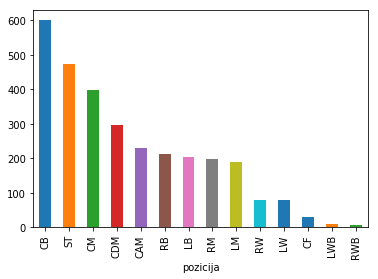

In [6]:
# Še grafični prikaz tega podatka
igralci.groupby('pozicija').size().sort_values(ascending=False).plot(kind='bar')

Zanimivo se mi zdi, da je število igralcev na različnih pozicijah tako različno. Vendar bi se to dalo pojasniti tako, da vsaka ekipa načeloma vedno igra z igralci na pozicijah CB, ST, CM, ki po vrsti spadajo na osnovni položaj branilca, napadalca in osrednjega vezista. Torej mesta, kot so RW, LWB pa so le nekakšna "različica" položajev RM, LB, le malo drugačno so usmerjeni na igrišču, le takih pa, kot je iz tabele razvidno, očitno ni v takem številu, kot tistih na osnovnih položajih.

Osnovni pogled
-----------------------

Pogled 10 najboljših igralcev v najpomembnejših kategorijah (ocena, cena, popularnost)

In [7]:
igralci.sort_values('ocena', ascending=False,)[['ime', 'ocena']][:10]

,ime,ocena
id,,
143,C. Ronaldo dos Santos Aveiro,94
341,Lionel Messi,94
846,Neymar da Silva Santos Jr.,92
594,Sergio Ramos García,91
343,Luis Suárez,91
385,Eden Hazard,91
291,Kevin De Bruyne,91
592,Luka Modric,91
596,Toni Kroos,90


In [8]:
igralci.sort_values('cena', ascending=False,)[['ime', 'cena']][:10]

,ime,cena
id,,
143,C. Ronaldo dos Santos Aveiro,2430000
341,Lionel Messi,870000
846,Neymar da Silva Santos Jr.,616000
386,N'Golo Kanté,376000
854,Kylian Mbappe Lottin,364000
242,Paul Pogba,363000
385,Eden Hazard,302000
602,Gareth Bale,300000
291,Kevin De Bruyne,284000


In [9]:
igralci.sort_values('popularnost', ascending=False,)[['ime', 'popularnost']][:10]

,ime,popularnost
id,,
854,Kylian Mbappe Lottin,3640
562,Pierre-Emerick Aubameyang,2883
470,Fábio Henrique Tavares,2863
386,N'Golo Kanté,2650
143,C. Ronaldo dos Santos Aveiro,2617
242,Paul Pogba,2484
341,Lionel Messi,2294
525,Heung Min Son,2083
469,Virgil van Dijk,2055


Opazimo, da se v vseh treh tabelah pojavljajo isti igralci, zato me zanima, kakšna je povezava med njimi, če le ta obstaja.

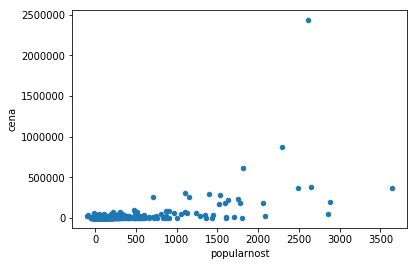

In [10]:
igralci.plot(y='cena',x='popularnost',kind='scatter')

Lahko je opaziti, da popularnost nekoliko res vpliva na ceno, vendar pa tudi ni res da so najdražji igralci tudi najbolj popularni. Lahko bi rekli, da so igralci, ki so cenovno še dostopni; torej v mislih imam tiste do 500000; tudi najbolj popularni, saj bi sklepal, da so le te tudi po oceni nekoliko višji od ostalih, kar bom preveril v nadaljevanu.

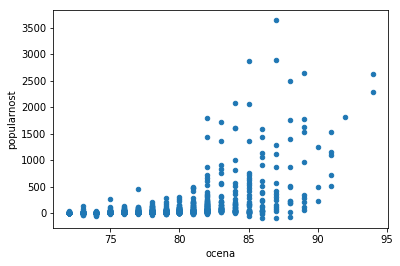

In [11]:
igralci.plot(y='popularnost',x='ocena',kind='scatter')

Kot sem že pravilno sklepal zgoraj se popularnost res začne višati pri igralcih z malo nadpovprečno oceno, če iz grafa razberem, bi bilo to približno pri oceni 82. Iz tega pa lahko sledi še en sklep; mislil bi si lahko, da bo tudi cena lahko začela naraščati ravno pri tej meji. Preverimo še to.

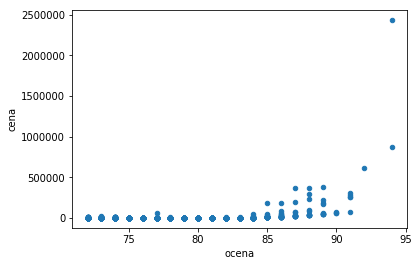

In [12]:
igralci.plot(y='cena',x='ocena',kind='scatter')

Ker iz tukaj ni čisto razvidno, kdaj približno začne rasti cena, saj ta pri najvišjih ocenah zelo iztopa, bom pogledal igralce, ki imajo oceno manjšo od 90, saj vidimo, da le en močno izstopa iz povprečja. Ker pa je iz grafa vseeno razvidno, da so bolje ocenjeni igralci vseeno več vredni in ker za naš sklep, le to ni tako pomembno, se bom osredotočil le na igralce z oceno med 79 in 90.

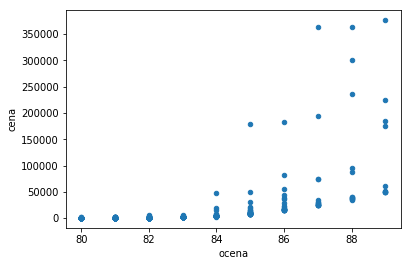

In [13]:
igralci[(igralci.ocena < 90) & (igralci.ocena > 79)].plot(y='cena',x='ocena',kind='scatter')

Tukaj, je to malo bolj razvidno, saj cene res začno naraščati malo po tistih z ocenami 82, torej bi lahko sklepal, da cena res začne naraščati pri igralcih s približno enako oceno, kot popularnost. Torej so vse tri lastnosti res v sorazmerju ena z drugo.

Sedaj poglejmo še 10 lig z največ igralci.

In [14]:
igralci.groupby(['id_lige', 'liga']).size().sort_values(ascending=False)

id_lige  liga             
13       Premier League       380
53       LaLiga Santander     358
31       Serie A TIM          316
19       Bundesliga           302
16       Ligue 1 Conforama    256
68       Süper Lig            145
308      Liga NOS             137
14       EFL Championship     113
353      SAF                  111
341      LIGA Bancomer MX     105
                             ... 
1        Superliga             12
17       Domino’s Ligue 2       9
56       Allsvenskan            9
351      Hyundai A-League       8
317      Liga Hrvatska          6
41       Eliteserien            5
347      South African FL       4
60       EFL League One         4
66       Ekstraklasa            3
83       K LEAGUE Classic       1
Length: 38, dtype: int64

Kako pa bi izgledala tabela, če jo razvrstimo po povprečju igralcev, ki igrajo v njej.

In [15]:
povprecje_lige = igralci.groupby(['id_lige', 'liga'])['ocena'].mean()
povprecje_lige.sort_values(ascending=False)

id_lige  liga             
13       Premier League       78.047368
53       LaLiga Santander     77.851955
2012     CSL                  77.687500
31       Serie A TIM          77.316456
19       Bundesliga           77.006623
3006     League of Russia     76.525000
308      Liga NOS             76.211679
332      Ukrayina Liha        75.903226
16       Ligue 1 Conforama    75.859375
68       Süper Lig            75.289655
                                ...    
319      Česká Liga           73.777778
347      South African FL     73.750000
14       EFL Championship     73.681416
17       Domino’s Ligue 2     73.666667
32       Calcio B             73.619048
54       LaLiga 1 I 2 I 3     73.555556
41       Eliteserien          73.200000
83       K LEAGUE Classic     73.000000
56       Allsvenskan          72.888889
60       EFL League One       72.750000
Name: ocena, Length: 38, dtype: float64

Lahko bi se reklo, da se podatki skladajo z mojimi pričakovanji, saj so Premier League, LaLiga Santander, Serie A TIM itd. tudi v resnici najpopularneše, torej v njih igrajo tudi najbolši igralci. Presenečenje predstavlja le CSL, za katerega še nisem slišal. Preverimo, katera liga bi to lahko bila.

In [16]:
igralci[igralci.id_lige == 2012].sort_values('cena', ascending=False).set_index('ime')[['ocena', 'vzdevek', 'cena']]

,ocena,vzdevek,cena
ime,,,
José Paulo Bezerra M. Júnior,85,Paulinho,8000
Olívio da Rosa,74,Ivo,3400
Christian Bassogog,74,NaN,3000
Da Conceição Fernando Henrique,74,Fernandinho,2000
Renato Ribeiro Calixto,74,Renatinho,1600
Yannick Carrasco,83,NaN,1600
Nikica Jelavic,73,NaN,1600
Givanildo Vieira de Souza,81,Hulk,1400
Anthony Modeste,81,NaN,1200


Opazimo, da kratica CSL predstavlja Chinese super league. Lahko bi rekel, da sem presenečen nad podatkom, a obenem ta podatek ni težko razložiti. Kot sem že v opisu projekta povedal, da kljub temu, da so podatki iz video igre, so le ti prirejeni po resničnih igralcih, zato lahko opazimo njuno povezavo. Tako da ta podatek obrazložim s tem, da je Kitajska v nogomet vložila zelo veliko denarja, ter si zagotovila nekaj zelo dobrih igralcev, ki sodijo v sam vrh najbolših. Omenil pa bi tudi, da je teh igralcev vseeno le 48, kar pomeni, da v ligi še mnogo igralcev, ki v analizo ni bilo zajetih, saj sem zajel le prvih 3000 najbolših igralcev po oceni. Če bi objel vse igralce, bi bilo to povprečje mnogo nižje.

Podobno analizo, ki sem jo naredil zgoraj za posamezno ligo, bi lahko naredil še za vsako državo in klub posebej. Vendar, da se ne bom preveč ponavljal, bom pokazal le 10 z najvišjim povprečjem cene.

In [17]:
igralci.groupby(['id_države', 'država'])[['cena']].mean().sort_values(by='cena', ascending=False)[:10]

,,cena
id_države,država,
115,Gabon,40340.000000
50,Wales,30610.000000
111,Egypt,30100.000000
38,Portugal,22160.434783
7,Belgium,14073.275862
60,Uruguay,8061.764706
18,France,8025.107296
52,Argentina,6818.119266
54,Brazil,6647.014925


In [18]:
igralci.groupby(['id_kluba', 'klub'])[['cena']].mean().sort_values(by='cena', ascending=False)[:10]

,,cena
id_kluba,klub,
45,Juventus,136938.095238
241,FC Barcelona,69425.000000
73,Paris Saint-Germain,58328.947368
243,Real Madrid,54342.500000
10,Manchester City,35497.500000
5,Chelsea,31893.478261
9,Liverpool,25384.090909
11,Manchester United,23015.909091
240,Atlético Madrid,19644.444444


Pozicija
-----------

V tem razdelku bom gledal, gledal igralce kot skupek tistih, ki igrajo na istih pozicijah, ter le iz tega poskušal ugotoviti nekaj že zastavljenih predpostavk.
Pa začnimo s tabelo, ki prikazuje povprečne podatke značilne za vsako pozicijo posebej.

In [19]:
opazovani_igralci_po_poziciji = igralci[igralci.columns.difference(['id_kluba', 'id_države', 'id_lige'])].groupby('pozicija').mean()
opazovani_igralci_po_poziciji

,cena,dribling,fizika,hitrost,obramba,...,popularnost,spretnost,strel,višina,šibka_noga
pozicija,,,,,,,,,,,
CAM,3835.964912,77.298246,62.714912,72.175439,46.982456,...,40.092105,3.578947,70.842105,177.039474,3.464912
CB,2868.833333,58.428333,76.303333,59.793333,76.025000,...,32.213333,2.078333,42.656667,186.961667,2.896667
CDM,2662.372881,69.722034,76.430508,62.016949,73.562712,...,37.277966,2.745763,58.383051,181.430508,3.094915
CF,33689.655172,80.931034,62.862069,78.758621,39.655172,...,241.620690,3.758621,75.655172,176.586207,3.620690
CM,2642.462312,75.452261,70.934673,66.469849,67.407035,...,45.145729,3.251256,67.635678,179.761307,3.326633
LB,2384.729064,72.743842,72.251232,76.847291,72.487685,...,25.438424,3.024631,57.147783,178.561576,2.901478
LM,1825.797872,77.994681,64.074468,81.053191,43.308511,...,41.500000,3.526596,70.542553,176.994681,3.452128
LW,15385.256410,80.153846,62.012821,82.551282,40.423077,...,111.987179,3.705128,72.256410,175.923077,3.435897
LWB,955.000000,73.600000,71.700000,82.100000,71.600000,...,10.900000,2.900000,54.100000,179.800000,2.600000


Tu je na prvi poglej moč opaziti, da se cena in višina med različnimi položaji zelo spreminja, zato bi bilo zanimivo pogledati, kako se cena spreminja od pozicije ter videti ali je višina kakorkoli pomembna za pozicijo. Pa začnimo z slednjim.

In [20]:
opazovani_igralci_po_poziciji['višina'].sort_values(ascending=False)

pozicija
CB     186.961667
ST     182.805497
CDM    181.430508
RWB    180.142857
LWB    179.800000
CM     179.761307
RB     179.173709
LB     178.561576
CAM    177.039474
LM     176.994681
RM     176.767677
CF     176.586207
RW     176.475000
LW     175.923077
Name: višina, dtype: float64

Iz tega podatka je zelo razločno videti, da so obrambni igralci v povprečju višji. Za nekoga, ki te oznake vidi prvič, naj omenim (kljub zgornji predstavitvi oznak, lahko pride do nerazumevanja), da k obrambnim igralcem spadajo oznake CB, CDM, RWB, LWB, RB, LB. Toda videti je tudi, da so napadalci v povprečju visoki. Iz česar bi lahko sklepal, da če visok igralec ne igra v napadu, bo vrjetno zastopal položaj v obrambi. No pa poglejmo še kako je višina igralca pomembna za njegovo ceno.

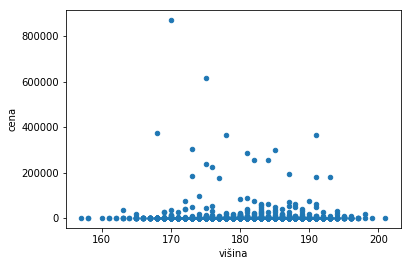

In [21]:
igralci[igralci.cena < 1000000].plot(x='višina', y='cena', kind='scatter')

Nekako, ni prav dobro razvidno, če je kakšna povezava, bi pa lahko rekli, da so najvrednejši igralci visoki približno 180 cm, kar pa ni prav nič presenetljivega, saj ta višina velja za neko povprečje v nogometu, kar pa tudi prikazuje zgostitev točk.

In [22]:
opazovani_igralci_po_poziciji['cena'].sort_values(ascending=False)

pozicija
CF     33689.655172
LW     15385.256410
RW     12726.250000
ST      8589.534884
CAM     3835.964912
CB      2868.833333
CDM     2662.372881
CM      2642.462312
LB      2384.729064
LM      1825.797872
RB      1380.281690
LWB      955.000000
RWB      950.000000
RM       889.898990
Name: cena, dtype: float64

No, tukaj pa je očitno razvidno, da so igralci v napadalnih položajih krepko vrednejši. Omenimo še enkrat, da položaji, kot so CF, LW, RW v igri sami nimajo veliko zastopajočih igralcev, vendar le te pa so po tabeli sklepajoč v poprečju zelo vredni.

Zanimivo bi bilo pogledati, kako se spreminjajo vrednosti sposobnosti igralca (med katere štejem oceno, hitrost, dribling, strel, obrambo, fiziko, podaje).

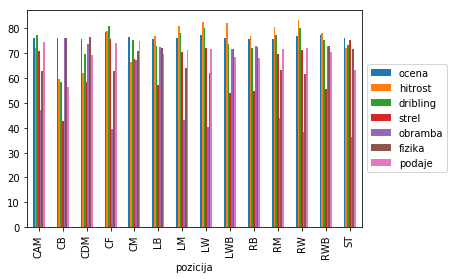

In [23]:
test_igralci = igralci.groupby('pozicija').mean()[['ocena', 'hitrost', 'dribling', 'strel', 'obramba', 'fizika', 'podaje']]
test_igralci.plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) # Prestavim legendo iz tabele

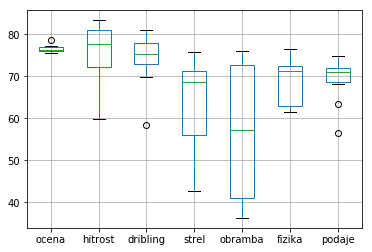

In [24]:
# Narišem še boxplot, da je lažje primerjati, ocene
test_igralci.boxplot()

Iz zgornjih dveh grafikonov bi lahko sklepali, da sta dribling in podaje najosnovnejši lastnosti vsakega igralca, saj sta le ti v povprečju v najmanjšem razmiku med vrednostmi. Po drugi strani pa je videti, da imata strel in obramba le tega največjega. Tu pa je sklep ravno nasprotem, po pogledu na zgornjo tabelo je videti, da je obramba visoka na obrambnih položajih, kar bi pričakovali, pri ostalih pa ta ravno ne blesti. Ravno obratno pa je strel, kajti ta je visok pri vseh napadalnih položajih in je zelo nizka pri obrambnih. Za hitrost pa bi si upal sklepati, da je med vsemi najpomembnejša, kajti je edina, katere povprečje je višje od povprečja ocene. Na srečo, pa sem to igro izkusil že na lstni koži in lahko iz prve roke potrdim to domnevo. Vendar, kljub moji izkušenosti nekaterim to potrdilo ne pomeni kaj dosti (pa bi moralo), zato upam, da vas prepriča, analiza, ki jo bom naredil v nadaljevanju naloge, da ravno hitrost ena izmed tistih, ki najbolj vpliva na ceno igralcev.

Cena igralcev
--------------------

Kot sem že zgoraj veliko podatkov primerjal v odvisnosti s ceno, bi rad zdaj ugotovil, katera na to najbolj vpliva.

In [25]:
sposobnosti = ['cena', 'ocena', 'hitrost', 'dribling', 'strel', 'podaje', 'obramba', 'fizika']
'''Ker sem opazil, da le nekaj igralcev -in to izrazito- presega mejo cene 500 000 bom 
le te izločil iz obdelave zaradi preglednosti podatkov''' 
def izrisi_graf(zacetek, konec, meja_cene=1000000):
    ax = igralci[igralci.cena < meja_cene].plot(x=sposobnosti[zacetek], y='cena', kind='scatter', label=sposobnosti[zacetek])
    for i, s in enumerate(sposobnosti[(zacetek + 1):konec]):
        igralci[igralci.cena < meja_cene].plot(x=s, y='cena', kind='scatter', ax=ax, color='C%s' % (i + 1), label=s)
    ax.set_xlabel("ocena")

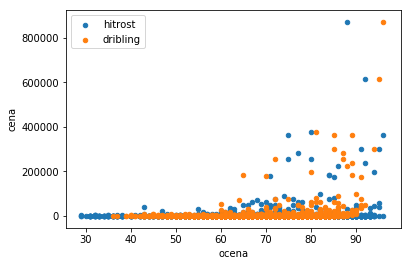

In [26]:
izrisi_graf(2, 4)

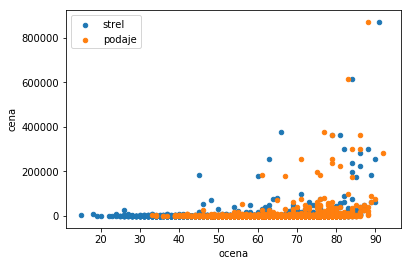

In [27]:
izrisi_graf(4, 6)

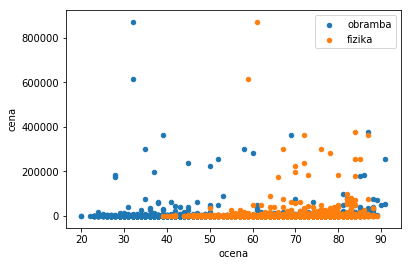

In [28]:
izrisi_graf(6,8)

Menim, da je iz vseh zgornjih grafikonov vidno, da sta fizika in obramba najnižji vrednosti, pri tistih, ki imajo visoke cene. Lahko sklepam, da le ti tudi najmanj vplivata na ceno igralcev.
Naslednja opazka je, da so ravno strel, hitrost in dribling najpomembnejše, če gledamo na vpliv, ki ga imajo na ceno. Ker pa so ravno te lastnosti značilne za napadalce,sklepamo da so napadalci tisti, ki imajo višje cene. Ta ugotovitev, pa se sklada s tabelo, v kateri smo izračunali povprečje cen po položajih.
Zanimiv podatek je tudi ta, da vsakemu igralcu, kateremu se hitrost približa 90, cena izjemno naraste. Prav tako bi lahko videli, da ima ravno grafikon s prikazom hitrosti najmanjšo zgostitev pri nizkih cenah. Iz tega bi si upal povedati, da je hitrost najpomembnejša lastnost, ki vpliva na ceno.

V tej analizi pa manjkata lastnosti (spretnost, šibka noga), kateri razpon ocen se ne sklada z ostalimi, zato bom te gledal posebej. 

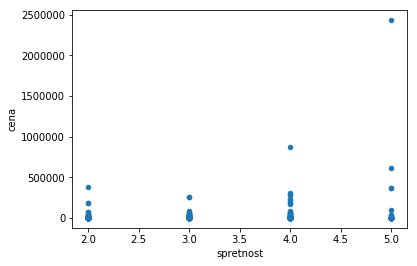

In [29]:
igralci.plot(x='spretnost', y='cena', kind='scatter')

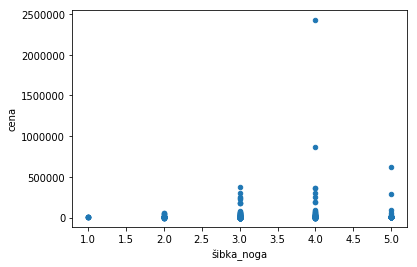

In [30]:
igralci.plot(x='šibka_noga', y='cena', kind='scatter')

Opaziti je, da ti dva podatka nimata takega vpliva na ceno. Razen izjem, bi rekel, da igralci z oceno šibke noge in spretnosti med 3 in 5 dosegajo približno enake cene. le ti z ocenami 1 in 2 pa je ocena občutno nižja. Zaradi teh opazk je težko narediti kakšen sklep, razen tega, da te ocene nimajo posebnega vpliva.

Zaključek
--------------

V projektni nalogi sem prišel, do nekaterih zanimivih dognanj, vendar vsa v meji mojih pričakovanj. Lahko bi rekel, da to, verjetno zato, ker imam s to igro veliko izkušenj, kar mi je tudi pomagalo pri obravnavi podatkov, da sem lažje prišel do raznih sklepov.  
Za konec pa bi se samo še rad zahvalil, ker ste si vzeli čas in prebrali mojo projektno nalogo, in upam da vam je bila všeč.